# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

В этом модуле мы поговорим об ещё одном направлении разведывательного анализа данных — проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

>Но мы же уже собрали данные на этапе сбора данных и подготовили данные на этапе очистки… Для чего повторно создавать части в EDA?

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 
***
При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой. 
***
В отличие от человека, модель машинного обучения не может проанализировать эти даты. А вот информация о просрочке (разница между плановой и фактической датой погашения) представлена в числовом формате и может сообщить некую информацию модели. Число, равное или меньше 0, говорит о клиенте как о благонадёжном заёмщике; число больше нуля характеризует заёмщика как должника. Такое конструирование признаков помогает дата-сайентисту не утратить часть данных, а также представить их в более «выгодном» свете.

В знакомой нам задаче винных обзоров информация о вкусовых качествах вина также может оказаться важной при его оценке, но не может быть передана в модель машинного обучения, так как этот признак — сплошной текст. Однако мы можем вычленить из текста информацию о положительной или отрицательной оценке вина, превратив её в признаки. Такой признак, скорее всего, оказался бы важным в определении качественных вин. Определить его значимость мы сможем только на этапе отбора признаков, который мы также будем изучать в модулях EDA.

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

В ЭТОМ МОДУЛЕ ВЫ УЗНАЕТЕ:
- какие этапы включает в себя проектирование признаков;
- что такое внешние источники данных;
- что такое кодирование признаков;
- что такое преобразование признаков;
- что такое отбор признаков.

В ЭТОМ МОДУЛЕ ВЫ НАУЧИТЕСЬ:
- создавать новые признаки;
- использовать внешние источники данных для проектирования признаков;
- кодировать и преобразовывать признаки;
- делать отбор лучших признаков.

# Создание признаков

>Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

- создание признаков;
- преобразование признаков;
- отбор признаков.

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.

***
Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал.
***

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

- с помощью внешних источников данных;
- из существующего набора данных.

>В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку. 

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

>Для определения дефолтности клиента банки делают запрос в БКИ с целью получения дополнительной информации по клиенту. 

***
БКИ - бюро кредитных истории
***

Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

- разбор категорий; 
- разбор даты и времени;
- разбор числовых признаков;
- разбор текста.

#### РАЗБОР ДАТЫ И ВРЕМЕНИ

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

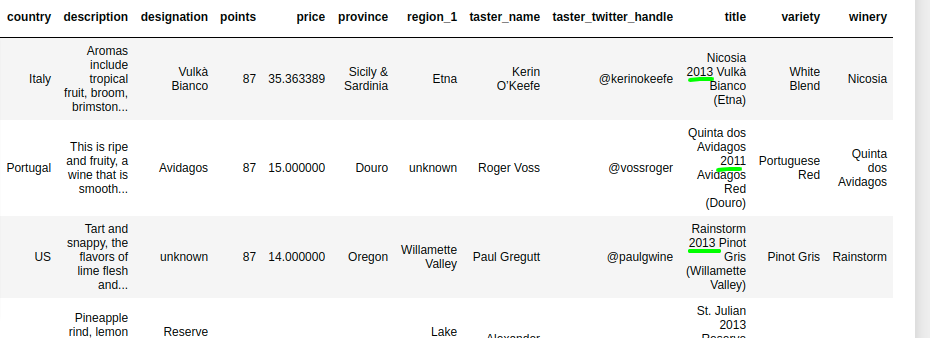

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

#### РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

In [54]:
data = pd.read_csv('data/wine_cleared.zip')

In [55]:
# оздадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.
***
>Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. 
***

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. 

#### РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

>Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

***
Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.
***

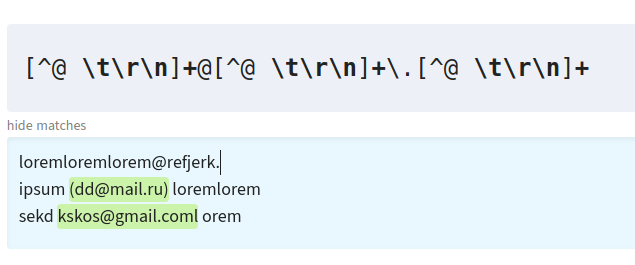

                        Демонстрация работы регулярного выражения для поиска email в тексте
                        
Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/).

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом [str.findall()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 



In [56]:
# код для нахождения года вина при помощи регулярного выражения:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d{4}:

- \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
- {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

***
Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.
***

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

Полученный признак year будет выглядеть следующим образом:
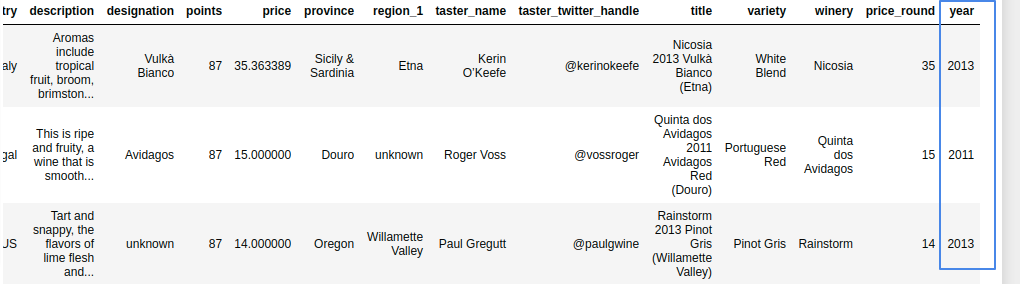

Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

#### РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [57]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [58]:
# В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.
data['country'].value_counts().head(3)

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

In [59]:
# Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.
# В ответ впишите результат выполнения кода data['is_france'].sum():
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [60]:
data['is_france'].sum()
data['is_italy'].sum()

22093

19540

***
Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.
***

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

In [64]:
# Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
# В ответ впишите результат выполнения кода data['old_wine'].sum():
# Так как у нас есть пропуски, но нам про них ничего не говорили, то при переводе 
# в datatime будем использовать параметр errors - неверный синтаксис будет установлен
# как Nan т.е вернет его
data['year'] = pd.to_datetime(data['year'], errors = 'coerce').dt.year
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)
data['old_wine'].sum()

39765

Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.

>Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [65]:
# здесь обратным слешем (\) экранируем скобку (, затем () показываем, что внутри будем
# искать выражение \w+ - любую цмфру, букву, вхождение символа, затем закрывающая скобка 
# экранированная
mask = '\((\w+)\)'
data['locality'] = data['title'].str.findall(mask).str.get(0)
data['locality']

0           Etna
1          Douro
2            NaN
3            NaN
4            NaN
           ...  
129966     Mosel
129967    Oregon
129968    Alsace
129969    Alsace
129970    Alsace
Name: locality, Length: 129971, dtype: object

# Создание признаков. Внешние источники данных

>Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

***
Для определения платежеспособности клиента банки часто используют данные из [Федеральной службы государственной статистики](https://rosstat.gov.ru/labor_market_employment_salaries), чтобы получить информацию о занятости клиента, размере оплаты труда для конкретного региона, в котором проживает клиент. Эта информация может оказаться важной в определении платёжеспособности клиента.
***

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

***
Коллекторская компания по договорённости с Федеральной службой судебных приставов дополнительно получает информацию об исполнительных производствах и других судебных процессах по своим клиентам. Это помогает обеспечивать более качественные взыскания.
***

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

***
Например, на сайте [Федеральной службы государственной статистики](https://rosstat.gov.ru/) (Росстат) вы можете [скачать данные](https://showdata.gks.ru/report/278934/) об общем приросте населения областей РФ в формате .XLSX, .CSV, .HTML, .DOCX. Вы уже работали с файлами различных форматов в модуле PYTHON-16. Как выгружать данные из файлов разных форматов.
***

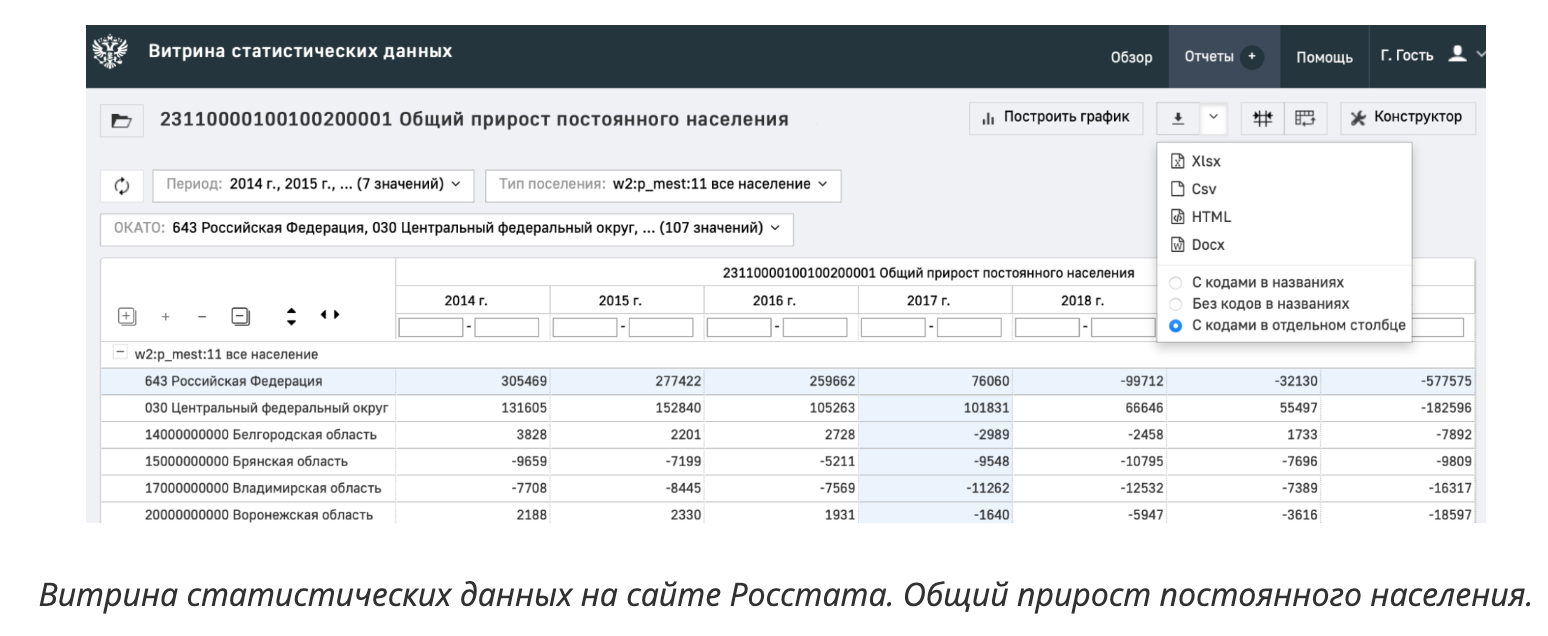

Дата-инженеры могут запрашивать у сотового оператора по API информацию о принадлежности номера телефона определённому клиенту. Такую информация можно использовать, чтобы выяснить, скрывает ли человек своё настоящее имя.

__Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу.__

Например, вы хотите в целях обучения создать модель, которая бы предсказывала стоимость автомобиля по заданным характеристикам. Из данных у вас есть только марка автомобиля и его стоимость. Произведя парсинг сайта [auto.ru](https://auto.ru/), вы сможете получить дополнительную информацию о марках автомобиля: тип кузова, габариты, расход топлива, — и понять, из каких параметров складывается цена на автомобиль.

Внешняя информация бывает общая и профильная.

>Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 

- географические: население страны, площадь страны, столица страны и так далее.
- экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
- статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

>Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить.

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в [Dadata.ru](https://dadata.ru/) для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

#### РАБОТА С ФАЙЛАМИ

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [66]:
# Дата-инженеры предоставили нам файл с данными о населении по странам.
import pandas as pd
country_population = pd.read_csv('data/country_population.zip', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [67]:
# Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


>Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [75]:
# В результате объединения получаем информацию о населении страны в каждой строке:
data = data.join(country_population.set_index('country'), on='country')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000"


In [71]:
# используем файл с информацией о площади страны.
country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [77]:
# Создайте новый признак area_country — площадь страны, аналогичный признаку population.
data = data.join(country_area.set_index('country'), on='country')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013.0,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011.0,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013.0,1,0,0,0,NaN,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012.0,1,0,0,0,NaN,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013.0,0,0,0,0,Mosel,"83,129,285",357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004.0,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013.0,0,1,0,0,Alsace,"68,035,000",547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012.0,0,1,0,0,Alsace,"68,035,000",547030.0


In [81]:
# Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve 
# Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'].area

94    9372610.0
Name: area, dtype: float64

>Итак, мы получили два новых признака, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов. Более профессиональные методы, например парсинг, вы будете использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

# Создание признаков. Работа с форматом «дата-время»

